# Introduction to data analysis - part 2: groupby and resample

## 1. Today's objectives

You are done pretreating data, it is now time to play with them...

Our objective today is to explore some classical graphs that illustrate variability in our data, and should give us a handle on simple questions such as:

- seasonality (mean annual cycle):
    - how does it change from one station to another? 
    - from one pollutant to another? 
    - does it fit with your knowledge of atmospheric chemistry?

- week-end effect, or the crossed influence of sociology and nature on urban air quality... (see for example Altshuler et al, 1995 ; Fujita et al, 2003): 
    - how can we show it?
    - is it everywhere? for any pollutant?

- average diurnal profiles:
    - are they similar in summer and winter? 
    - how does it change 

- and what about statistical distributions?

- and what about trends? 

most probably, time will run out before we get to the bottom of such a list... 

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# pd.set_option('plotting.backend', 'hvplot')
#pd.set_option('plotting.backend', 'pandas_bokeh')
#pd.set_option('plotting.backend', 'matplotlib')

### 2. to work!

Don't forget the [advanced Cheat-Sheet](../aide/Enthought-Python-Pandas-Cheat-Sheets-1-8-v1.0.2.pdf)...

first, we recover the data we just pretreated. Either from the file you created when you did the pre-treatment, or from `../data/data_airrhonalpes_part2.csv` that got pulled from the repository when you initiated the sequence

- **complete the following cell to upload the file properly into `dfc`... options are the key!**

- **if you did things right, columns should be numeric data, and the index should be a `DatetimeIndex`, not an index of `dtype'object'` (check `parse_dates` option https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)**

- **you will then select a subset of the data into `mon_df`, on which you'll work afterwards (ex: one pollutant in all the stations, or all the pollutants in one station, or whichever choice suits you...)**

In [2]:
dfc = pd.read_csv('../data/clean_data_p2.csv',sep=';', low_memory=False,
                  header=[0,1], index_col=0, parse_dates=True)#, ???)

print(dfc.index)

#mon_df = dfc.xs('NO2', level='Polluant', axis='columns')['2012'].plot()
mon_df = dfc['Traffic'].dropna(how='all')

DatetimeIndex(['2010-07-01 00:00:00', '2010-07-01 01:00:00',
               '2010-07-01 02:00:00', '2010-07-01 03:00:00',
               '2010-07-01 04:00:00', '2010-07-01 05:00:00',
               '2010-07-01 06:00:00', '2010-07-01 07:00:00',
               '2010-07-01 08:00:00', '2010-07-01 09:00:00',
               ...
               '2015-12-31 15:00:00', '2015-12-31 16:00:00',
               '2015-12-31 17:00:00', '2015-12-31 18:00:00',
               '2015-12-31 19:00:00', '2015-12-31 20:00:00',
               '2015-12-31 21:00:00', '2015-12-31 22:00:00',
               '2015-12-31 23:00:00', '2016-01-01 00:00:00'],
              dtype='datetime64[ns]', length=48242, freq=None)


### 2.1. basic approach: split / apply / combine!

In each of the examples above, it will be necessary to do something like:
- split a dataframe in N small packets, according to some condition (summer versus winter; this day or another in the year; a given hour in the day, for any day; ...) 
- calculate some aggregated value for each packet (typically, calculate an average)
- combine the N results calculated for each packet, thus creating a new "reduced" dataframe  

This can be done "by hand", with loops and all that. but it will certainly be a piece or more or less clumsy code, bug prone, and you'll spend the day scratching your head.

Or, you can use the tools proposed by pandas, even if those may seem a little abstract at first, and require you to think harder.

A (very) good place to learn about this approach is here:
- http://wesmckinney.com/blog/groupby-fu-improvements-in-grouping-and-aggregating-data-in-pandas/


![](../aide/split-apply-combine.png)

The structure of the code will always be similar:

> grouped = mon_df.method_making_packets()

> df_reduit = grouped.reduction_method()

the first line *splits* the initial dataframe according to the method used; the second line *apply-combines*, i.e. calculates some aggregated value for each packet, then combines those values into a reduced dataframe

NB: it is always possible to combine those lines together, but it complicates the research of errors:

> mon_df.methode_qui_fait_les_paquets().methode_de_reduction().plot()

### 2.2. resampling...

The graphs that you drew in the first part of the practical, and the zooms that you did should gave convinced you that there is a strong variability within each year, at the diurnal scale as well as at the weekly scale (due to synoptic weather patterns). 

To smooth out the first layer of variability, it is possible to replace hourly data by daily averages (or medians). This is possible though resampling our dataframe(`.resample()`, this is the *split* step), at a given time frequency, then average (`.mean()`, or `median()`, depending on your choice. this is the *apply-combine* step)

`.resample()` accepts all kinds of arguments, including: "a": annual, "w": weekly, "m": monthly, "d": daily, "3d"...

**your turn to write the code necessary to calculate and plot daily averages, weekly, monthly averages**
- **does this represent a seasonal cycle?**
- **and if we resample at a monthly frequency? weekly?**

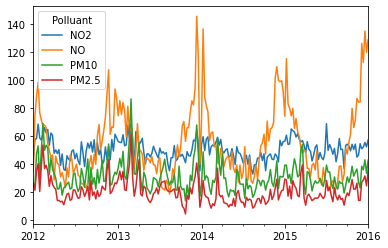

In [3]:
#your code here

# pd.set_option('plotting.backend', 'hvplot')

grouped = mon_df.resample('w')

resampled_df = grouped.mean()

resampled_df.plot()

**some more detailed inspection of things:**

to get a proper idea of this grouping thing, we can look into it:

In [50]:
print(grouped)
print()
for i, packet in enumerate(grouped): 
    if i < 3: # print only first 3 packets
        print(packet)

DatetimeIndexResampler [freq=<Week: weekday=6>, axis=0, closed=right, label=right, convention=start, origin=start_day]

(Timestamp('2012-01-01 00:00:00', freq='W-SUN'), Polluant              NO2    NO  PM10  PM2.5
2012-01-01 02:00:00  37.0  16.0  25.0   24.0
2012-01-01 03:00:00  46.0  32.0  26.0   29.0
2012-01-01 04:00:00  55.0  60.0  37.0   36.0
2012-01-01 05:00:00  57.0  64.0  47.0   41.0
2012-01-01 06:00:00  40.0  35.0  48.0   43.0
2012-01-01 07:00:00  28.0   7.0  30.0   31.0
2012-01-01 08:00:00  20.0   1.0  21.0   22.0
2012-01-01 09:00:00  33.0  15.0  19.0   20.0
2012-01-01 10:00:00  43.0  47.0  29.0   33.0
2012-01-01 11:00:00  37.0  37.0  37.0   36.0
2012-01-01 12:00:00  40.0  31.0  29.0   29.0
2012-01-01 13:00:00  33.0  21.0  29.0   30.0
2012-01-01 14:00:00  39.0  21.0  20.0   19.0
2012-01-01 15:00:00  69.0  27.0  20.0   20.0
2012-01-01 16:00:00  48.0   9.0  18.0   21.0
2012-01-01 17:00:00  58.0  47.0  13.0   16.0
2012-01-01 18:00:00  55.0  67.0  25.0   21.0
2012-01-01 19:00:00  

this clearly shows that this `grouped` is not a very simple thing (`DatetimeIndexResampler ...`). 

but it shows what is in it: packets containing the datetime of each packet and the sub-dataframe corresponding to those datetimes

This is all good, but resampling and averaging also kills the information on variability, which can be added back on the graphs. `pandas` does that by using the following strategy:

first drawing the full dataframe, in semi transparent points, and save the `axes` i.e. the `matplotlib` object containing the graph

- **complete the following code** (it lacks color control... this can be achieved by tweaking matplotlib even more)

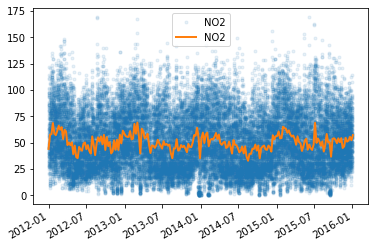

In [4]:
# pd.set_option('plotting.backend', 'matplotlib')

my_ax = mon_df.plot(y='NO2', style='.', alpha=0.1)

resampled_df.plot(y='NO2', ax=my_ax, linewidth=2)


### 2.3. Smoothing

Another way to smooth the variability out is to calculate moving averages (quite similar to resampling), which will also smooth the variability, while keeping the total size of the dataframe unchanged. 



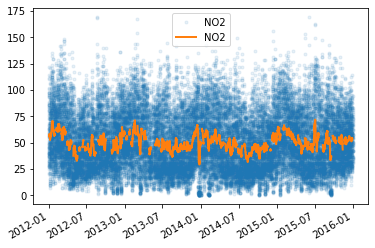

In [5]:
my_ax = mon_df.plot(y='NO2', style='.', alpha=0.1)

averaged_df = mon_df.rolling(window=24*7, center=True).mean()
averaged_df.plot(y='NO2', ax=my_ax, linewidth=2)



### 2.4. annual cycle - diurnal - weekly average

The previous approaches gave us an ideal of interannual variability, but not an access to some average seasonal cycle calculated from all the years in the dataframe! With `.resample`, the packets formed are continuous and successive.

To calculate an average seasonal cycle, we would need to make a packet, for example, with all the data from any day in [january, february, ...] whatever the year. It would be like "folding" our dataset before slicing and averaging. 

This is `.groupby()`'s job!

`.groupby()` is the workhorse of the split-apply-combine strategy. It has three modus operandi:
- `.groupby(col_name)`: you get one packet for each individual value that exist in the column `col_name`. 
- `.groupby(ser.grouping_method())`: you get one packet for each individual value obtained after applying `.grouping_method()` to a given series `ser`. Most often used with `index` as the series tested, as you will see next
- `.groupby(grouping_function)`: you get one packet for each individual value obtained after applying the often user-defined `grouping_function`to the index

In our case (average seasonal cycle), we could imagine creating a new column in the dataframe containing the number of the month for each measurement, and group upon this new column. The second syntax actually avoids creating this column.

Amongst the useful `.grouping_method()` are those that apply to datetime columns such as:
- `.week`: returns the number of the week in the year (1..52)
- `.month`: returns the month number (1..12)
- `.weekday`: returns the day in the week (Monday = 0; sunday = 6)
- `.hour`: returns the hour

For example, check `mon_df.index.month`

**plot the average cycles you care about (annual, diurnal, weekly)**

**do some of those graphs answer our initial questions? (e.g. the week-end effect)**

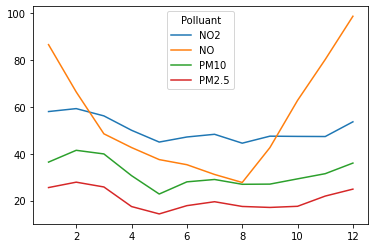

In [6]:
## your code here

grouped = mon_df.groupby(mon_df.index.month)

grouped.mean().plot()

We are almost there... here, we lost the information on the variability... and the strategy used before (transparent points behind the calculated average) is much harder to apply (at least I do not have an easy way out)

One option is to shade the variability around the calculated average.

Some libraries exist that take care of it (maybe `seaborn`... but how?)

In the next cell is a custom made function that does just that. Attention, it only works with a real "gouping_function"

**replot your cycles with this new toy. is it better?**

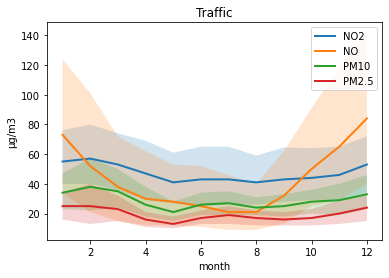

In [19]:
# pd.set_option('plotting.backend', 'hvplot')

grouper = lambda x:x.month

"""
remarque:
ici, grouping_function est définie par ce qu'on appelle une "notation lambda"
ca se lit comme une définition mathématique de fonction. 
ici, grouping_function est la fonction (la lambda) qui à x associe x.week
une alternative serait d'écrire

def grouping_function(x):
    return x.week
    
l'avantage (le seul) de la notation lambda est qu'elle tient sur une ligne
"""

def joligraph(mon_df, grouping_function, robust=True, quantile=0.25, 
              units='µg/m3', title=None, xlabel=None, ymax=None, save=None):
    # calcule les bornes à tracer, selon la méthode choisie (robuste ou pas)
    if robust:
        estime = mon_df.dropna().groupby(grouping_function).median()
        bas = mon_df.dropna().groupby(grouping_function).quantile(quantile)
        haut = mon_df.dropna().groupby(grouping_function).quantile(1-quantile)
    else:
        estime = mon_df.dropna().groupby(grouping_function).mean()
        err = mon_df.dropna().groupby(grouping_function).std()
        bas = estime - err
        haut = estime + err

    # trace les choses joliement   
    d = estime.index.values
    plt.figure()
    try:
        for col in estime.columns:
            base_line, = plt.plot(d, estime[col],linewidth=2, label=col)
            plt.fill_between(d, bas[col].values, haut[col].values, 
                     facecolor=base_line.get_color(), alpha=0.2)
    except AttributeError:
        base_line, = plt.plot(d, estime,linewidth=2, label=estime.name)
        plt.fill_between(estime.index.values, bas.values, 
                     haut.values, facecolor=base_line.get_color(), alpha=0.2)
#     plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.legend()
    plt.ylabel(units)
    if xlabel is not None: plt.xlabel(xlabel)
    if title is not None: plt.title(title)
    if ymax is not None: plt.ylim(0,ymax)
    if save is not None: plt.savefig(save+'.jpg', dpi=300)

######################
# enter your code here 

joligraph(mon_df, grouper, robust=True, quantile=0.25, 
          units='µg/m3', title='Traffic', xlabel='month')

### 2.4. Using filters and masks

If we think about our air quality problem, we have to admit that probably, things are quite different in summer and winter, and maybe comparing average diurnal cycle between two stations should only be done within a given season to be representative?

So, we now need strategies to look only at some part of our dataframe. 

This is what masks are for: a mask is a series of boolean that is used to identify rows to select in a dataframe.

**use these masks, then the joligraph function to draw the profiles**

Reminder:
- `.week`: returns the number of the week in the year (1..52)
- `.month`: returns the month number (1..12)
- `.weekday`: returns the day in the week (Monday = 0; sunday = 6)
- `.hour`: returns the hour

In [10]:
mask_ete = (mon_df.index.month>5) & (mon_df.index.month<9)
mask_hiver = (mon_df.index.month<3) | (mon_df.index.month>11)

mask_we = mon_df.index.weekday > 4 #to identify week-end days


print(len(mask_ete), len(mask_hiver))

34870 34870


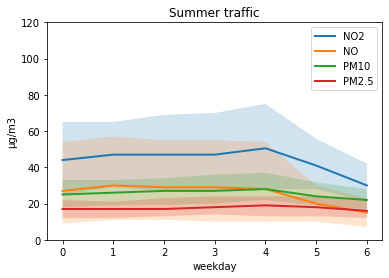

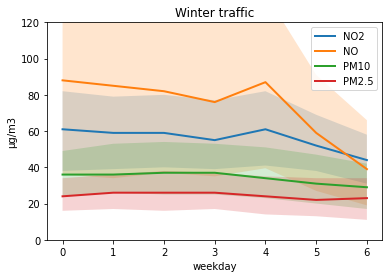

In [22]:
grouper = lambda x:x.weekday

joligraph(mon_df[mask_ete], grouper, ymax=120, xlabel='weekday', title='Summer traffic')
joligraph(mon_df[mask_hiver], grouper, ymax=120, xlabel='weekday', title='Winter traffic')

**so finally, do you get any visible week-end effect in our data?**

Try to watch the plots in hourly or weekday. And like the other time, upload your figures on this [whiteboard]( https://app.mural.co/t/variabiliteclimatique4363/m/variabiliteclimatique4363/1632908663484/1f4eb7e42954ae38dacfad167535ede3c8fa0064?sender=ufcbfba826e94d93c633c7410). Try to choose a combination that has not been done yet (seasonal and/or weekend effect). To save your figures, you can use the `save` option of the `joligraph` function: `joligraph(... save='title')`.

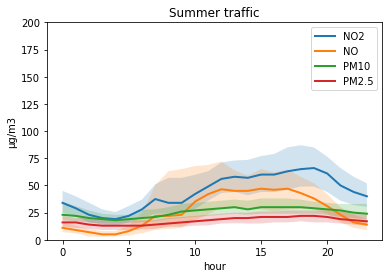

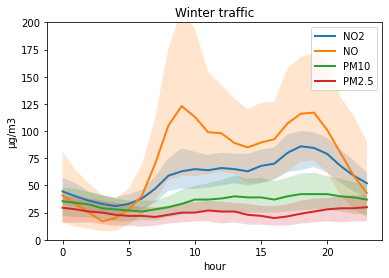

In [20]:
grouper = lambda x:x.hour

joligraph(
    mon_df[mask_ete], grouper, 
    title='Summer traffic', xlabel='hour', ymax=200, 
#     save='summer_traffic_hourly'
)
joligraph(
    mon_df[mask_hiver], grouper, 
    title='Winter traffic', xlabel='hour', ymax=200, 
#     save='winter_traffic_hourly'
)

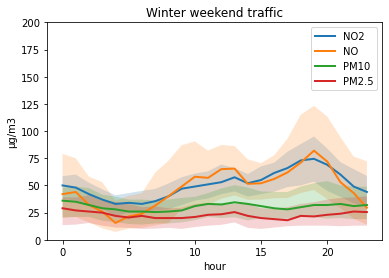

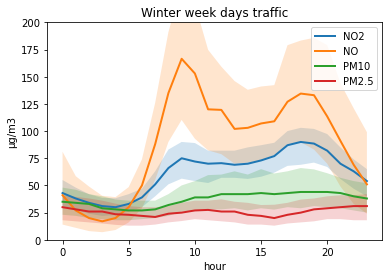

In [21]:
grouper = lambda x:x.hour

joligraph(
    mon_df[mask_hiver & mask_we], grouper, 
    title='Winter weekend traffic', xlabel='hour', ymax=200,
#     save='winter_WE_traffic_hourly'

)
joligraph(
    mon_df[mask_hiver & ~mask_we], grouper, 
    title='Winter week days traffic', xlabel='hour', ymax=200,
#     save='winter_weekdays_traffic_hourly'

)

Another (less graphical, and more statistically savvy), is to use statistical tests. The tools necessary for that are essentially into several statistical libraries

- the core statistical library is `scipy.stats`. 
- a more modern library is the R inspired `statsmodels`

the latter is more "high level" than the former. I, as a naive chemist, am somewhat lost with it. But you're smarter than I am...

## 3. trends...

I have a nice longer dataset on one station (30 years, daily averages) on which it is possible to do some trend analysis...

first we shall read the data into a nicely behaved DataFrame. Basically, it is the same as last time. 

In [23]:
df_long = pd.read_csv('../data/cham-sur-drac-jour.csv',sep=';',na_values='-')
df_long.drop(['Mesure','Unit','Station'],axis='columns',inplace=True)
df_long = df_long.set_index('Polluant').T.dropna(how='all')

df_long.index = pd.to_datetime(df_long.index, dayfirst=True)
df_long.head()

Polluant    Dioxyde d'azote  Monoxyde d'azote  Ozone
2000-01-01             25.0               8.0   12.0
2000-01-02             28.0              13.0   10.0
2000-01-03             32.0              23.0    9.0
2000-01-04             42.0              33.0   11.0
2000-01-05             37.0              31.0    9.0

We now want to do some trend analysis. 

Many options are available for that: 
- regular linear regression
- more advanced non parametric methods
- other...

### 3.1. Linear regression

We will start with a simple linear regression. one implementation of linear regression is `linregress` within the core statistical python library `scipy.stats`

here, we want to carry out a linear regression between time and a concentration variable. Time, as a date - hour is a complex animal. Is it a number? Is it an alphanumeric object? It depends on the way the language actually handles time. Within pandas, datetime is a number, in nanosecond since 1970-01-01...
- the good thing: it is a number! So we can calculate regressions
- the bad thing: it has stupid units (nanoseconds)! So we need to "convert" it

The conversion is done by calculating an x that will be explicitely a number in the right unit (here, we choose year).

Note that pandas actually knows how to substract a date to another date to get a `Timedelta` (which is a duration).

In [24]:
from scipy import stats

df_long['x'] = (df_long.index - pd.Timestamp("2000-01-01")) / pd.Timedelta('1y')

stats.linregress?

df_long.head()

Polluant    Dioxyde d'azote  Monoxyde d'azote  Ozone         x
2000-01-01             25.0               8.0   12.0  0.000000
2000-01-02             28.0              13.0   10.0  0.002738
2000-01-03             32.0              23.0    9.0  0.005476
2000-01-04             42.0              33.0   11.0  0.008214
2000-01-05             37.0              31.0    9.0  0.010952

Signature: stats.linregress(x, y=None)
Docstring:
Calculate a linear least-squares regression for two sets of measurements.

Parameters
----------
x, y : array_like
    Two sets of measurements.  Both arrays should have the same length.  If
    only `x` is given (and ``y=None``), then it must be a two-dimensional
    array where one dimension has length 2.  The two sets of measurements
    are then found by splitting the array along the length-2 dimension.  In
    the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
    equivalent to ``linregress(x[0], x[1])``.

Returns
-------
slope : float
    Slope of the regression line.
intercept : float
    Intercept of the regression line.
rvalue : float
    Correlation coefficient.
pvalue : float
    Two-sided p-value for a hypothesis test whose null hypothesis is
    that the slope is zero, using Wald Test with t-distribution of
    the test statistic.
stderr : float
    Standard error of the estimated gradient.

See also
---

Use the description of `linregress` to calculate the decreasing slope of a pollutant over time and check that this decrease is significant (use the p_value).

Beware: if you get nan from `.linregress`, it means you have nan in the data you use. You can get around that using `.dropna()` on the input.

In [25]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_long[['x',"Dioxyde d'azote"]].dropna())

#below is a pretty way of printing with a defined format
print('{:2.2f} ± {:2.2f} µg m-3 per decade'.format(slope*10,std_err*10))
print('p_value: {:2.1e} probability that the slope is actually zero'.format(p_value))

-6.34 ± 0.29 µg m-3 per decade
p_value: 2.4e-99 probability that the slope is actually zero


We now want to draw the curves with the fitted linear trend. 

The first option is to calculate the fitted values in a new column, using the intercept and slope obtained from linregress, and really draw the variable and the calculated fit.

This is in the next cell, with a monthly resampling, because otherwise it is desperately cluttered.

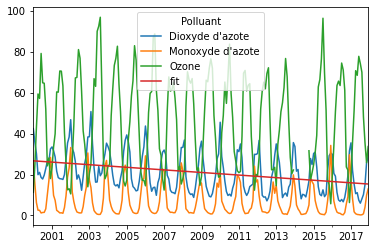

In [26]:
df_long['fit']=intercept+slope*df_long['x']

df_long.resample('m').mean().drop('x',axis='columns').plot()


### 3.2. Other kinds of trend analysis

Another very good library to explore is statmodels: https://github.com/statsmodels/statsmodels

it offers normally a more consistent statistical analysis framework, and is meant to work seamlessly with pandas

amongst tings, it has a naive seasonal decomposition that can be applied to our problem here




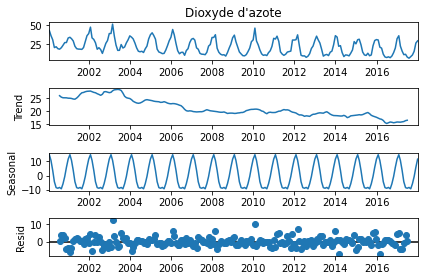

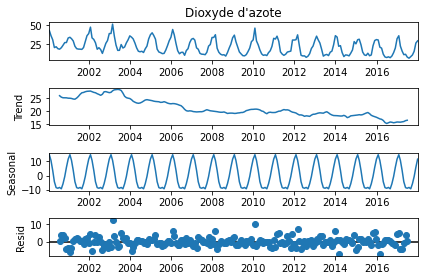

In [28]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(df_long["Dioxyde d'azote"].resample('M').mean())

res.plot()

#STL = sm.tsa.seasonal.STL(df_long["Dioxyde d'azote"].resample('M').mean())

#STL.plot()

## 6. Conclusions

Normalement, vous devriez être un peu convaincus que l'exploitation judicieuse de gros jeux de données permet de :
- représenter les données de façon parlante
- que cette représentation doit refléter les questions qu'on se pose
- qu'elles aident alors à :
    - répondre (un peu) à ces questions
    - se représenter les phénomènes importants

Ce traitement initial et cette représentation graphique sont donc très importants, et leur pertinence est très directement fonction de :
- votre aptitude à vous poser des questions pertinentes sur votre jeu de données (expertise / curiosité / recherche)
- votre maitrise d'outils de traitement adaptés...

La curiosité, ça s'entretient ; l'expertise, ça se construit ; la compétence technique, ça se travaille...

Concernant ce dernier point en particulier : coder, c'est comme parler anglais. C'est pas une option, et c'est avant tout de la pratique. Il suffit de quelques bases. Pour le reste, google et stackoverflow sont vos amis !!! 